<a href="https://colab.research.google.com/github/Mariana-rc01/WattWise/blob/main/Patr%C3%ADcia_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TOTAL NUMBER OF PRODUCTION UNITS FOR OWN CONSUMPTION**

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_excel("/Dataset.xlsx")

In [53]:
# Primeiras 10 linhas
df.head(10)

,Trimestre,Distrito,Concelho,Freguesia,Código Postal,Tipo de Tecnologia,Nível de Tensão,Escalão de potência instalada (kW),Número de instalacões,Potência Total Instalada UPAC (kW),Código Distrito,Código Concelho,Código Freguesia,CPEs (#),relacao_instalacoes_por_cpe,relacao_potencia_por_cpe
0,2024T3,Braga,Vila Nova de Famalicão,Riba de Ave,4765,Solar,BTE,"]30, 1000]",1,40.0,3,312,031234,57414,0.000017,0.000697
1,2024T3,Braga,Vila Nova de Famalicão,Riba de Ave,4765,Solar,MT,"]30, 1000]",3,463.0,3,312,031234,57414,0.000052,0.008064
2,2024T3,Braga,Vila Nova de Famalicão,Oliveira (Santa Maria),4765,Solar,MT,"]30, 1000]",2,169.6,3,312,031239,57414,0.000035,0.002954
3,2024T3,Braga,Vila Nova de Famalicão,Vale (São Martinho),4770,Solar,MT,"]30, 1000]",1,136.0,3,312,031241,57414,0.000017,0.002369
4,2024T3,Braga,Vila Nova de Famalicão,Oliveira (São Mateus),4765,Solar,MT,"]30, 1000]",2,1720.0,3,312,031242,57414,0.000035,0.029958
5,2024T3,Braga,Vila Nova de Famalicão,Avidos e Lagoa,4770,Solar,MT,"]30, 1000]",2,1008.0,3,312,031252,57414,0.000035,0.017557
6,2024T3,Braga,Vila Nova de Famalicão,Esmeriz e Cabeçudos,4760,Solar,BTE,"]30, 1000]",1,50.0,3,312,031254,57414,0.000017,0.000871
7,2024T3,Braga,Vila Nova de Famalicão,"Gondifelos, Cavalões e Outiz",4760,Solar,MT,"]30, 1000]",1,60.0,3,312,031255,57414,0.000017,0.001045
8,2024T3,Braga,Vila Nova de Famalicão,"Lemenhe, Mouquim e Jesufrei",4770,Solar,MT,"]30, 1000]",3,360.5,3,312,031256,57414,0.000052,0.006279
9,2024T3,Braga,Vila Nova de Famalicão,"Lemenhe, Mouquim e Jesufrei",4775,Solar,MT,"]30, 1000]",1,53.0,3,312,031256,57414,0.000017,0.000923


In [55]:
df = df[df['Trimestre'].str.startswith(('2023', '2024'))].copy()
df

,Trimestre,Distrito,Concelho,Freguesia,Código Postal,Tipo de Tecnologia,Nível de Tensão,Escalão de potência instalada (kW),Número de instalacões,Potência Total Instalada UPAC (kW),Código Distrito,Código Concelho,Código Freguesia,CPEs (#),relacao_instalacoes_por_cpe,relacao_potencia_por_cpe
0,2024T3,Braga,Vila Nova de Famalicão,Riba de Ave,4765,Solar,BTE,"]30, 1000]",1,40.00,3,312,031234,57414,0.000017,0.000697
1,2024T3,Braga,Vila Nova de Famalicão,Riba de Ave,4765,Solar,MT,"]30, 1000]",3,463.00,3,312,031234,57414,0.000052,0.008064
2,2024T3,Braga,Vila Nova de Famalicão,Oliveira (Santa Maria),4765,Solar,MT,"]30, 1000]",2,169.60,3,312,031239,57414,0.000035,0.002954
3,2024T3,Braga,Vila Nova de Famalicão,Vale (São Martinho),4770,Solar,MT,"]30, 1000]",1,136.00,3,312,031241,57414,0.000017,0.002369
4,2024T3,Braga,Vila Nova de Famalicão,Oliveira (São Mateus),4765,Solar,MT,"]30, 1000]",2,1720.00,3,312,031242,57414,0.000035,0.029958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121289,2023T1,Coimbra,Coimbra,São Martinho de Árvore e Lamarosa,3030,Solar,BTN,"]0, 4]",2,3.34,6,603,060337,95472,0.000021,0.000035
121290,2023T1,Coimbra,Coimbra,São Martinho do Bispo e Ribeira de Frades,3040,Solar,BTN,"]0, 4]",13,19.19,6,603,060338,95472,0.000136,0.000201
121291,2023T1,Coimbra,Coimbra,Souselas e Botão,3020,Solar,BTN,"]0, 4]",104,129.81,6,603,060339,95472,0.001089,0.001360
121292,2023T1,Coimbra,Coimbra,Trouxemil e Torre de Vilela,3020,Não Atribuído,BTN,"]0, 4]",1,3.60,6,603,060341,95472,0.000010,0.000038


In [56]:
# Nomes das colunas
df.columns.tolist()

['Trimestre',
 'Distrito',
 'Concelho',
 'Freguesia',
 'Código Postal',
 'Tipo de Tecnologia',
 'Nível de Tensão',
 'Escalão de potência instalada (kW)',
 'Número de instalacões',
 'Potência Total Instalada UPAC (kW)',
 'Código Distrito',
 'Código Concelho',
 'Código Freguesia',
 'CPEs (#)',
 'relacao_instalacoes_por_cpe',
 'relacao_potencia_por_cpe']

In [57]:
# Missing values
df.isna().sum().sort_values(ascending=False)

,0
Nível de Tensão,2
Trimestre,0
Concelho,0
Distrito,0
Freguesia,0
Código Postal,0
Tipo de Tecnologia,0
Escalão de potência instalada (kW),0
Número de instalacões,0
Potência Total Instalada UPAC (kW),0


Temos que tomar uma decisão em relação aos missing values no nivel de tensão. Sendo apenas duas observações, poderíamos eliminar.

In [58]:
# Colunas a remover
colunas_remover = [
    'Freguesia',
    'Concelho',
    'Código Postal',
    'Código Distrito',
    'Código Concelho',
    'Código Freguesia'
]

# Remover colunas
df = df.drop(columns=[col for col in colunas_remover if col in df.columns])

# Verificar resultado
print("Colunas restantes:")
print(df.columns.tolist())

Colunas restantes:
['Trimestre', 'Distrito', 'Tipo de Tecnologia', 'Nível de Tensão', 'Escalão de potência instalada (kW)', 'Número de instalacões', 'Potência Total Instalada UPAC (kW)', 'CPEs (#)', 'relacao_instalacoes_por_cpe', 'relacao_potencia_por_cpe']


In [59]:
# Número de linhas e colunas
print(f"Dimensões do dataset: {df.shape}")

Dimensões do dataset: (88545, 10)


In [60]:
df.head(10)

,Trimestre,Distrito,Tipo de Tecnologia,Nível de Tensão,Escalão de potência instalada (kW),Número de instalacões,Potência Total Instalada UPAC (kW),CPEs (#),relacao_instalacoes_por_cpe,relacao_potencia_por_cpe
0,2024T3,Braga,Solar,BTE,"]30, 1000]",1,40.0,57414,0.000017,0.000697
1,2024T3,Braga,Solar,MT,"]30, 1000]",3,463.0,57414,0.000052,0.008064
2,2024T3,Braga,Solar,MT,"]30, 1000]",2,169.6,57414,0.000035,0.002954
3,2024T3,Braga,Solar,MT,"]30, 1000]",1,136.0,57414,0.000017,0.002369
4,2024T3,Braga,Solar,MT,"]30, 1000]",2,1720.0,57414,0.000035,0.029958
5,2024T3,Braga,Solar,MT,"]30, 1000]",2,1008.0,57414,0.000035,0.017557
6,2024T3,Braga,Solar,BTE,"]30, 1000]",1,50.0,57414,0.000017,0.000871
7,2024T3,Braga,Solar,MT,"]30, 1000]",1,60.0,57414,0.000017,0.001045
8,2024T3,Braga,Solar,MT,"]30, 1000]",3,360.5,57414,0.000052,0.006279
9,2024T3,Braga,Solar,MT,"]30, 1000]",1,53.0,57414,0.000017,0.000923


In [61]:
# Info geral
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88545 entries, 0 to 121293
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Trimestre                           88545 non-null  object 
 1   Distrito                            88545 non-null  object 
 2   Tipo de Tecnologia                  88545 non-null  object 
 3   Nível de Tensão                     88543 non-null  object 
 4   Escalão de potência instalada (kW)  88545 non-null  object 
 5   Número de instalacões               88545 non-null  int64  
 6   Potência Total Instalada UPAC (kW)  88545 non-null  float64
 7   CPEs (#)                            88545 non-null  int64  
 8   relacao_instalacoes_por_cpe         88545 non-null  float64
 9   relacao_potencia_por_cpe            88545 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 9.4+ MB


After inspecting the dataset structure, it consists of 121,294 observations and 10 columns. The data types are suitable for further analysis: categorical attributes are represented as objects, while quantitative measures are correctly stored as integers or floats.

**How shall we handle the quarters? Convert them to dates?**

## **Análise dos CPEs**

In [62]:
# Verificar duplicados na coluna 'CPEs (#)'
duplicados = df['CPEs (#)'].duplicated().sum()

print(f"Número de duplicados na coluna 'CPEs (#)': {duplicados}")

# Opcional: ver quais são os valores duplicados
valores_duplicados = df[df['CPEs (#)'].duplicated(keep=False)]['CPEs (#)']
print("\nValores duplicados encontrados:")
print(valores_duplicados.unique())

Número de duplicados na coluna 'CPEs (#)': 88268

Valores duplicados encontrados:
[ 57414  24489  78294  58097  37183  30067   6887  24201   5000   7004
  30986   8416  14896  18309   8149   6789  39844  27993  11497   4175
  30386  12663  17452   8316   5716   7954  44342  36559  24550  10751
   5622   6445   7498  13859   3400   3603  11239  24524  95472   9537
  50436  10093  14390  14909   8808  11900   9426   5032   4909   4316
   9483  33414  10911   3664   4244   7317   3837  54466  46547   9968
   9087  37713   5250  84279  25300  15528  10725  23777  37851  14753
  25253   7824  12550   9859 129010 399456 112151  19439  51201 103880
 217560   6067  52740  79147  99483  82749   2921   3200   5358  13592
   2602   6900  15808   3606  32142  11997  28437  84001  23195  71886
  27430  98822  26615  33720  36076 178959  45501  30842  48769  47828
 165785  19342  25295   8344   4614  17958  14922   6272  11748  12713
   7994   4267   6857  13089  38508  27625  22381   4416  32738   

In [63]:
# Verificar duplicados na coluna 'CPEs (#)'
duplicados = df['CPEs (#)'].duplicated().sum()
print(f"Número de duplicados na coluna 'CPEs (#)': {duplicados}\n")

# Listar valores duplicados
valores_duplicados = df[df['CPEs (#)'].duplicated(keep=False)]['CPEs (#)'].unique()
print("Valores duplicados encontrados:")
print(valores_duplicados)

# Gerar resumo de quantos trimestres cada CPE aparece
# Supondo que exista uma coluna 'Trimestre'
resumo = df.groupby('CPEs (#)')['Trimestre'].nunique().reset_index()
resumo.rename(columns={'Trimestre': 'Qtd_Trimestres'}, inplace=True)

# Mostrar apenas os CPEs que aparecem em mais de um trimestre
resumo_duplicados = resumo[resumo['Qtd_Trimestres'] > 1]
print("\nCPEs que aparecem em mais de um trimestre:")
print(resumo_duplicados)

Número de duplicados na coluna 'CPEs (#)': 88268

Valores duplicados encontrados:
[ 57414  24489  78294  58097  37183  30067   6887  24201   5000   7004
  30986   8416  14896  18309   8149   6789  39844  27993  11497   4175
  30386  12663  17452   8316   5716   7954  44342  36559  24550  10751
   5622   6445   7498  13859   3400   3603  11239  24524  95472   9537
  50436  10093  14390  14909   8808  11900   9426   5032   4909   4316
   9483  33414  10911   3664   4244   7317   3837  54466  46547   9968
   9087  37713   5250  84279  25300  15528  10725  23777  37851  14753
  25253   7824  12550   9859 129010 399456 112151  19439  51201 103880
 217560   6067  52740  79147  99483  82749   2921   3200   5358  13592
   2602   6900  15808   3606  32142  11997  28437  84001  23195  71886
  27430  98822  26615  33720  36076 178959  45501  30842  48769  47828
 165785  19342  25295   8344   4614  17958  14922   6272  11748  12713
   7994   4267   6857  13089  38508  27625  22381   4416  32738   

These appear as duplicates because each CPE is recorded in every quarter ( 8 quarters) when the installations are maintained, so they are legitimate.

## **Variáveis Numéricas**

In [64]:
# Estatísticas descritivas das variáveis numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Número de instalacões,88545.0,17.478085,58.107265,1.000000,1.000000,2.000000,8.000000,2118.000000
Potência Total Instalada UPAC (kW),88545.0,122.100283,383.688157,0.000000,14.040000,30.000000,82.790000,19600.000000
CPEs (#),88545.0,45250.293229,60362.537318,1260.000000,10911.000000,27430.000000,57414.000000,399456.000000
relacao_instalacoes_por_cpe,88545.0,0.000824,0.002352,0.000003,0.000036,0.000116,0.000492,0.052016
relacao_potencia_por_cpe,88545.0,0.005884,0.031134,0.000000,0.000469,0.001443,0.004070,3.203661


**Número de instalações**

Média: 17.47 → em média cada registro tem ~18 instalações.

Desvio padrão: 58.11 → alto, indicando grande variabilidade entre municípios/registros.

Distribuição: mediana = 2, 25% = 1, 75% = 8 → assimétrica: a maioria dos registros tem poucas instalações, mas alguns têm valores extremamente altos (máx = 2118), possivelmente outliers ou grandes centros de produção.

**Potência Total Instalada UPAC (kW)**

Média: 122.10 kW → relativamente baixa considerando que há grandes outliers.

Desvio padrão: 383.69 kW → muito alto, novamente mostrando forte variabilidade.

Quartis: 25% = 14.04 kW, mediana = 30.00 kW, 75% = 82.79 kW

Máximo: 19,600 kW → indica a existência de algumas instalações muito grandes.

Conclusão: a maioria das unidades são pequenas, mas existem grandes instalações que aumentam bastante a média.

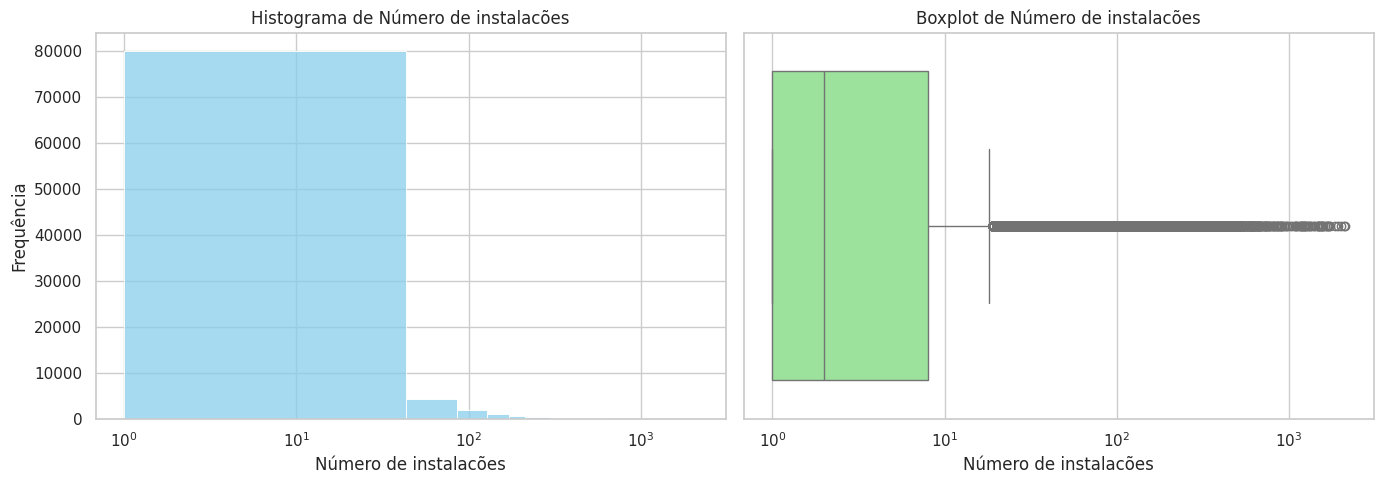

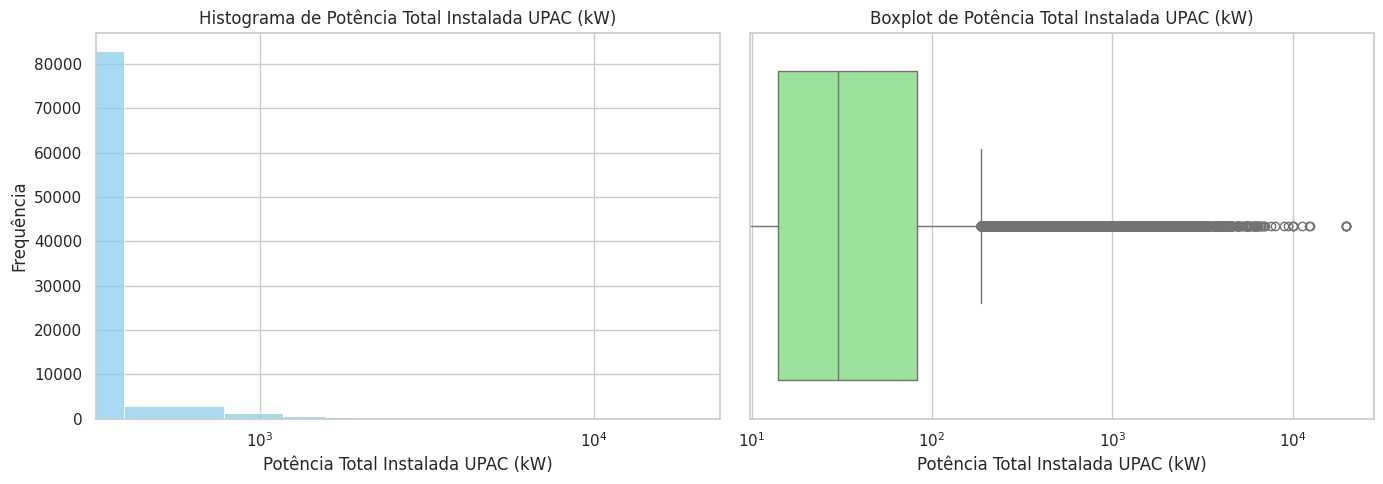

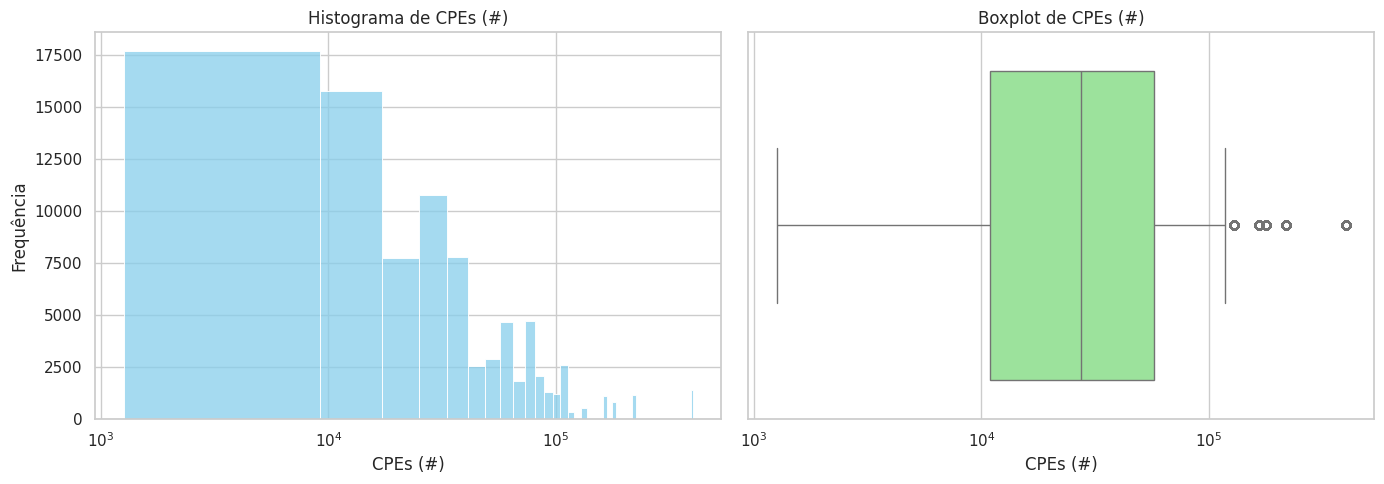

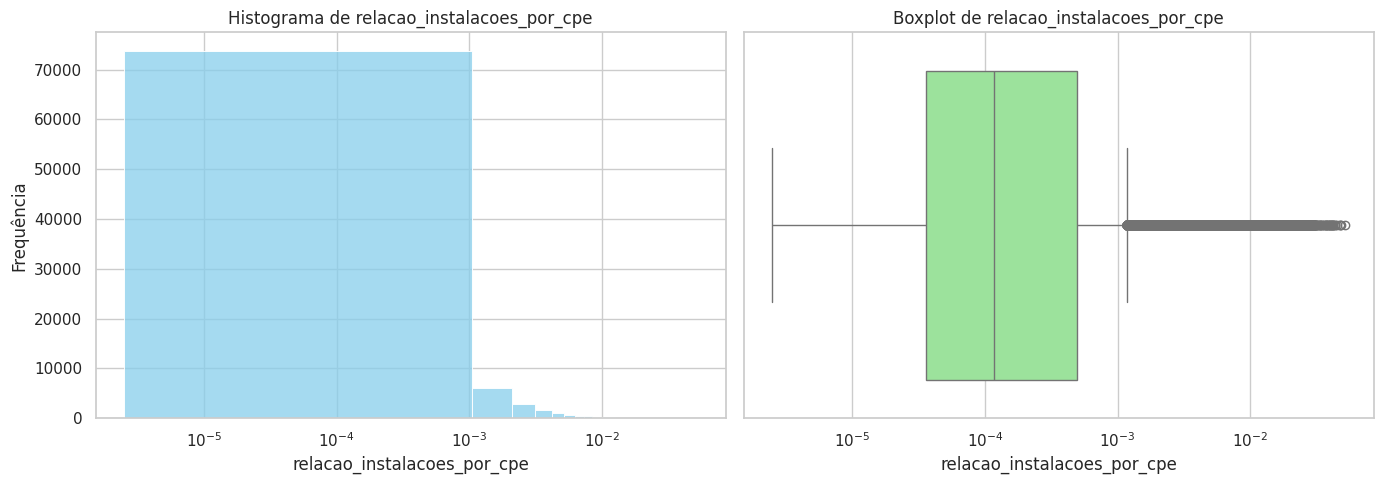

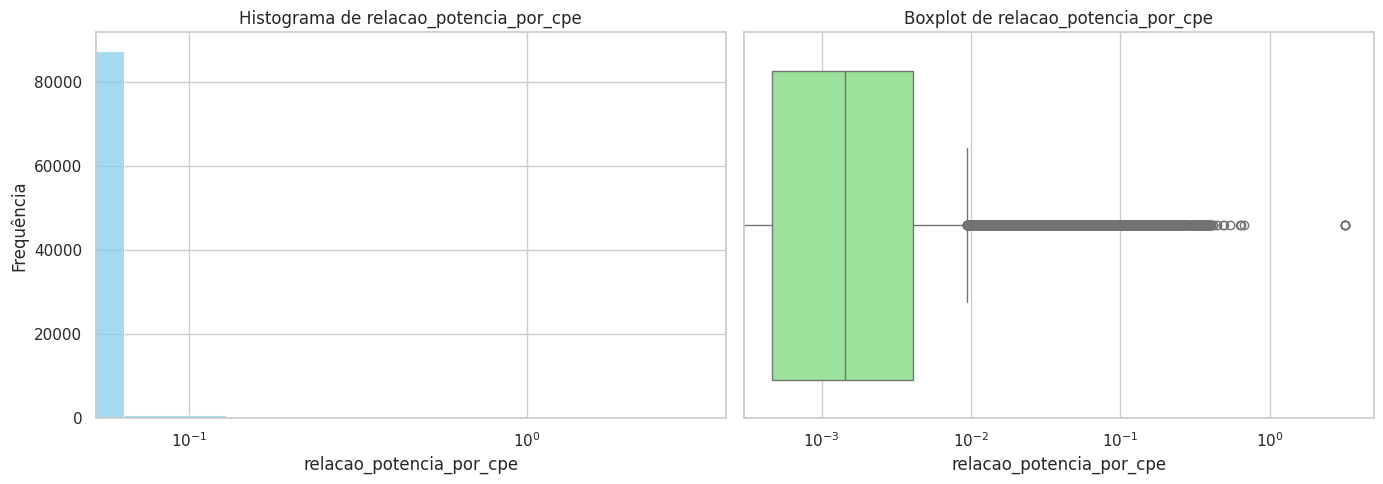

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações gerais
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

numericas = [
    'Número de instalacões',
    'Potência Total Instalada UPAC (kW)',
    'CPEs (#)',
    'relacao_instalacoes_por_cpe',
    'relacao_potencia_por_cpe'
]

# Loop para criar histogramas e boxplots
for col in numericas:
    fig, axes = plt.subplots(1, 2, figsize=(14,5))

    # Histograma
    sns.histplot(df[col], bins=50, kde=False, ax=axes[0], color='skyblue')
    axes[0].set_title(f'Histograma de {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequência')

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], color='lightgreen')
    axes[1].set_title(f'Boxplot de {col}')

    # Escala logarítmica para variáveis com grandes outliers
    if df[col].max() / df[col].median() > 10:
        axes[0].set_xscale('log')
        axes[1].set_xscale('log')

    plt.tight_layout()
    plt.show()


Temos vários outliers no nº de instalações e na potência instalada - decidir o que vamos fazer?

## **Variáveis Categóricas**

In [66]:
# Selecionar colunas categóricas, excluindo 'Trimestre'
cat_cols = [col for col in df.select_dtypes(include='object').columns if col != 'Trimestre']

cat_cols

['Distrito',
 'Tipo de Tecnologia',
 'Nível de Tensão',
 'Escalão de potência instalada (kW)']

In [67]:
# Gerar tabela de count e proportion para cada variável categórica
categorical_tables = {}

for col in cat_cols:
    counts = df[col].value_counts(dropna=False)  # inclui NaNs se existirem
    prop = counts / counts.sum()

    summary_df = pd.DataFrame({
        'Category': counts.index,
        'Count': counts.values,
        'Proportion': prop.values
    })

    categorical_tables[col] = summary_df

    print(f"\n=== {col} ===")
    display(summary_df)


=== Distrito ===


,Category,Count,Proportion
0,Braga,11479,0.129640
1,Porto,10880,0.122875
2,Lisboa,7954,0.089830
3,Viseu,6639,0.074979
4,Aveiro,6436,0.072686
5,Santarém,5263,0.059439
6,Leiria,4916,0.055520
7,Coimbra,4621,0.052188
8,Guarda,3789,0.042792
9,Viana do Castelo,3770,0.042577



=== Tipo de Tecnologia ===


,Category,Count,Proportion
0,Solar,81673,0.922390
1,Não Atribuído,6714,0.075826
2,Eólica,100,0.001129
3,Biogás,31,0.000350
4,Hídrica,10,0.000113
5,Cogeração não renovável,8,0.000090
6,Biomassa,5,0.000056
7,Fotovoltaica,4,0.000045



=== Nível de Tensão ===


,Category,Count,Proportion
0,BTN,55793,0.630109
1,MT,16412,0.185352
2,BTE,16072,0.181512
3,AT,266,0.003004
4,NaN,2,0.000023



=== Escalão de potência instalada (kW) ===


,Category,Count,Proportion
0,"]0, 4]",32329,0.365114
1,"]4, 20.7]",26359,0.297690
2,"]30, 1000]",16247,0.183489
3,"]20.7, 30]",13513,0.152612
4,>1000,95,0.001073
5,ND,2,0.000023


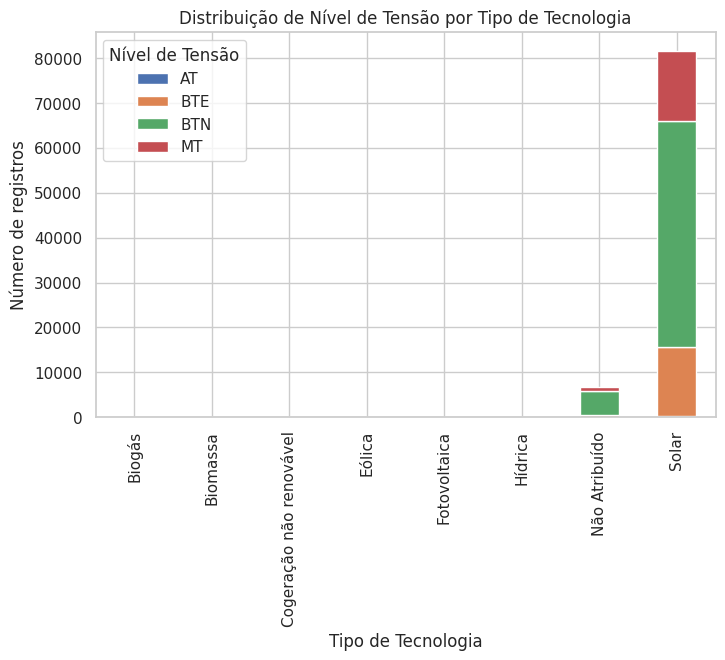

In [68]:
pd.crosstab(df['Tipo de Tecnologia'], df['Nível de Tensão']).plot(kind='bar', stacked=True, figsize=(8,5))
plt.title('Distribuição de Nível de Tensão por Tipo de Tecnologia')
plt.ylabel('Número de registros')
plt.show()

Não muito útil desta forma, mas poderá ser se o fizermos de forma individual para cada variável. Isto se decidirmos avançar com o Tipo de Tecnologia.

/tmp/ipython-input-185095391.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


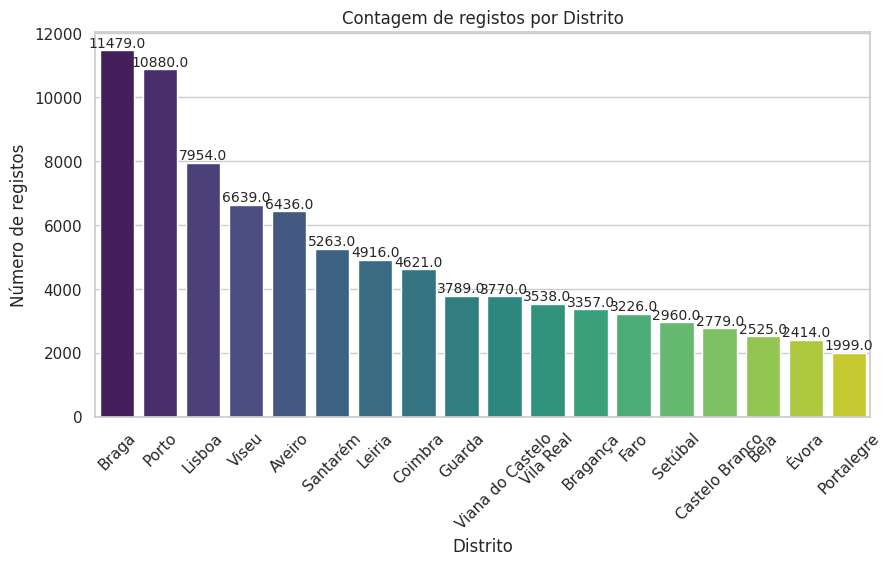

/tmp/ipython-input-185095391.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


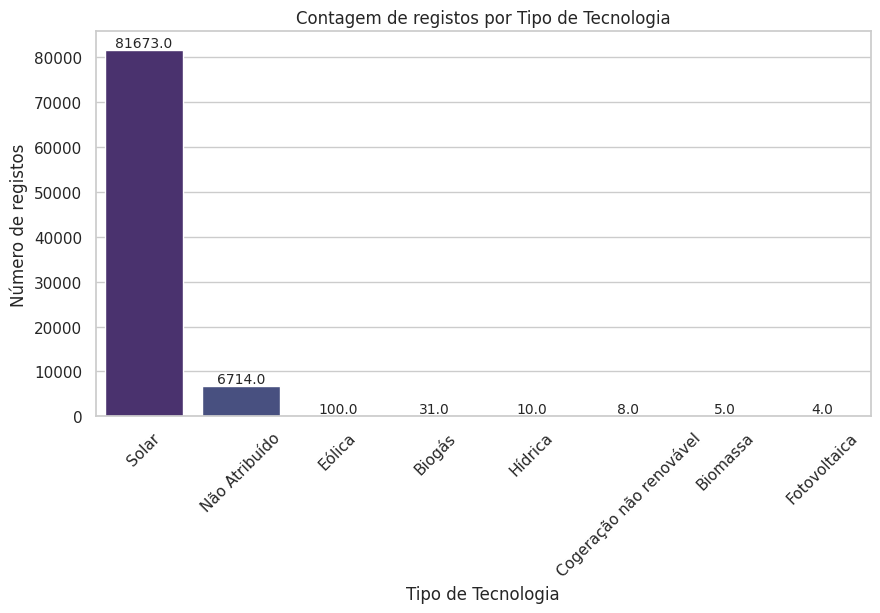

/tmp/ipython-input-185095391.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


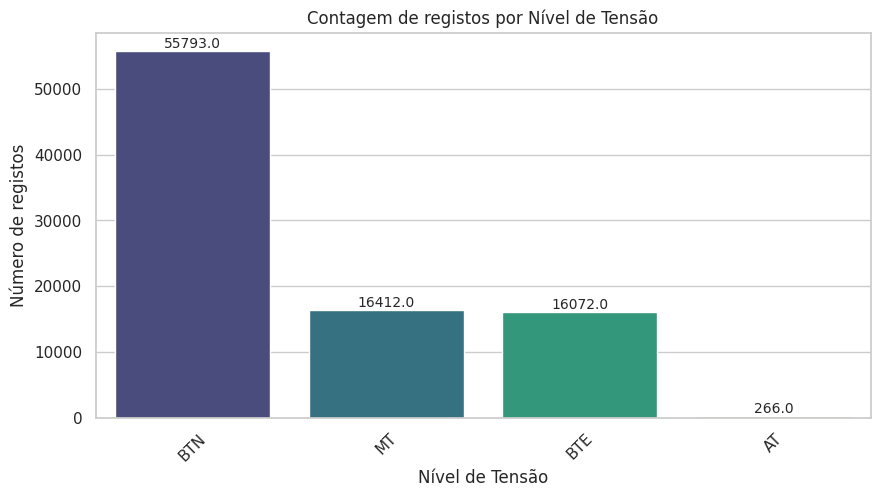

/tmp/ipython-input-185095391.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')


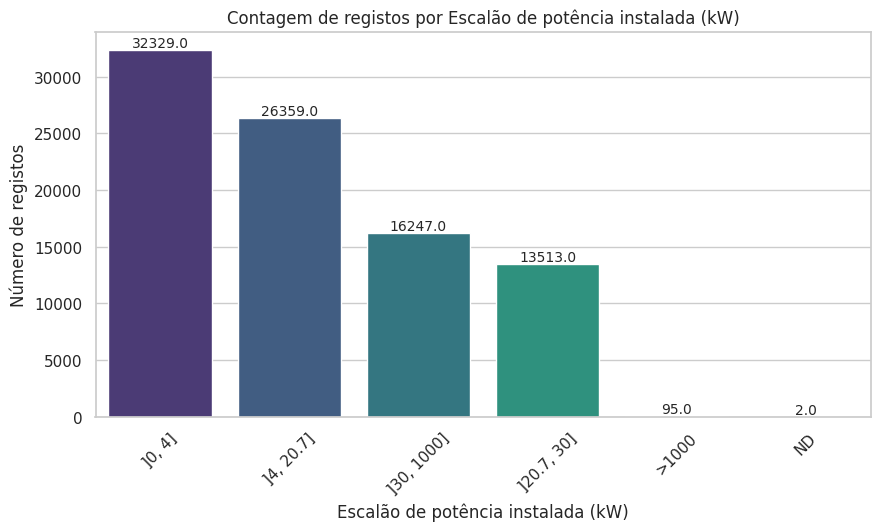

In [69]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10,5)

# Loop para criar bar plots com etiquetas
for col in cat_cols:
    plt.figure(figsize=(10,5))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Contagem de registos por {col}')
    plt.xlabel(col)
    plt.ylabel('Número de registos')
    plt.xticks(rotation=45)

    # Adicionar etiquetas em cima das barras
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='bottom', fontsize=10)

    plt.show()


Temos que tomar uma decisão em relação aos tipos de tecnologia. Uma das possibilidades seria agrupar as categorias de menor dimensão numa só.

## **Exploração**

Média de unidades de produção por trimestre e município

In [70]:
# Agrupar por Trimestre e Distrito, calculando a média de unidades de produção
media_producao = df.groupby(['Trimestre', 'Distrito'])['Número de instalacões'].mean().reset_index()

# Renomear coluna para ficar mais claro
media_producao.rename(columns={'Número de instalacões': 'Media_unidades_producao'}, inplace=True)

# Mostrar o resultado
print(media_producao)

    Trimestre          Distrito  Media_unidades_producao
0      2023T1            Aveiro                14.451777
1      2023T1              Beja                 7.865672
2      2023T1             Braga                12.803172
3      2023T1          Bragança                 5.152113
4      2023T1    Castelo Branco                 9.245509
..        ...               ...                      ...
139    2024T4           Setúbal                55.938931
140    2024T4  Viana do Castelo                13.506986
141    2024T4         Vila Real                13.286022
142    2024T4             Viseu                13.680226
143    2024T4             Évora                13.683432

[144 rows x 3 columns]


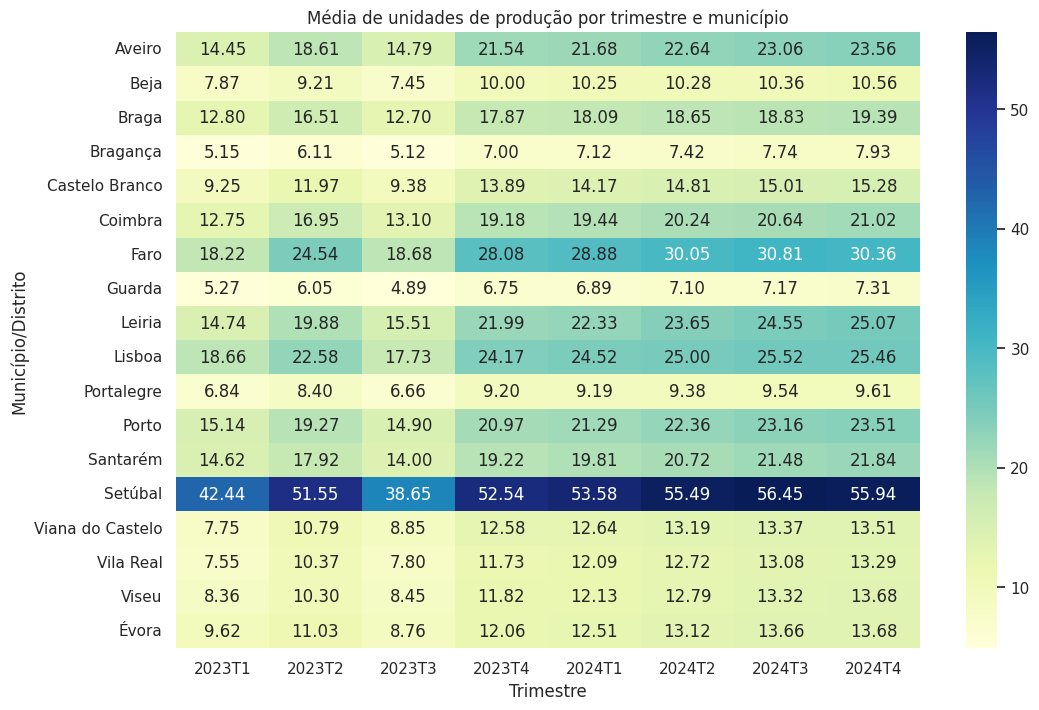

In [71]:
# Pivot para heatmap
pivot = media_producao.pivot(index='Distrito', columns='Trimestre', values='Media_unidades_producao')

plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Média de unidades de produção por trimestre e município")
plt.ylabel("Município/Distrito")
plt.xlabel("Trimestre")
plt.show()

Correlações
Ver se há correlações entre potência instalada total e número de unidades, ou entre tecnologia e potência.

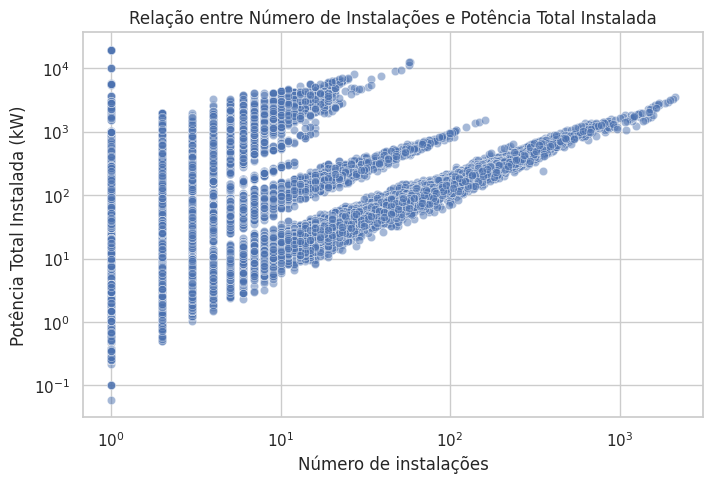

In [73]:
# Scatter plot para ver a relação
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Número de instalacões', y='Potência Total Instalada UPAC (kW)', alpha=0.5)
plt.title('Relação entre Número de Instalações e Potência Total Instalada')
plt.xlabel('Número de instalações')
plt.ylabel('Potência Total Instalada (kW)')
plt.yscale('log')  # log scale para lidar com outliers
plt.xscale('log')
plt.show()

/tmp/ipython-input-3735992563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Tipo de Tecnologia', y='Potência Total Instalada UPAC (kW)', palette='Set2')


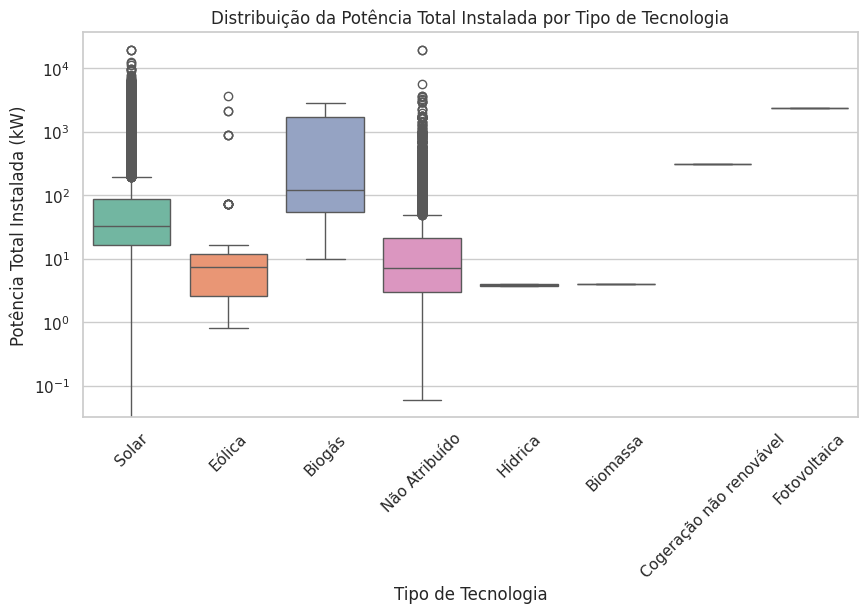

In [74]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='Tipo de Tecnologia', y='Potência Total Instalada UPAC (kW)', palette='Set2')
plt.title('Distribuição da Potência Total Instalada por Tipo de Tecnologia')
plt.yscale('log')  # log scale para lidar com outliers
plt.ylabel('Potência Total Instalada (kW)')
plt.xlabel('Tipo de Tecnologia')
plt.xticks(rotation=45)
plt.show()

Correlação entre variáveis numéricas

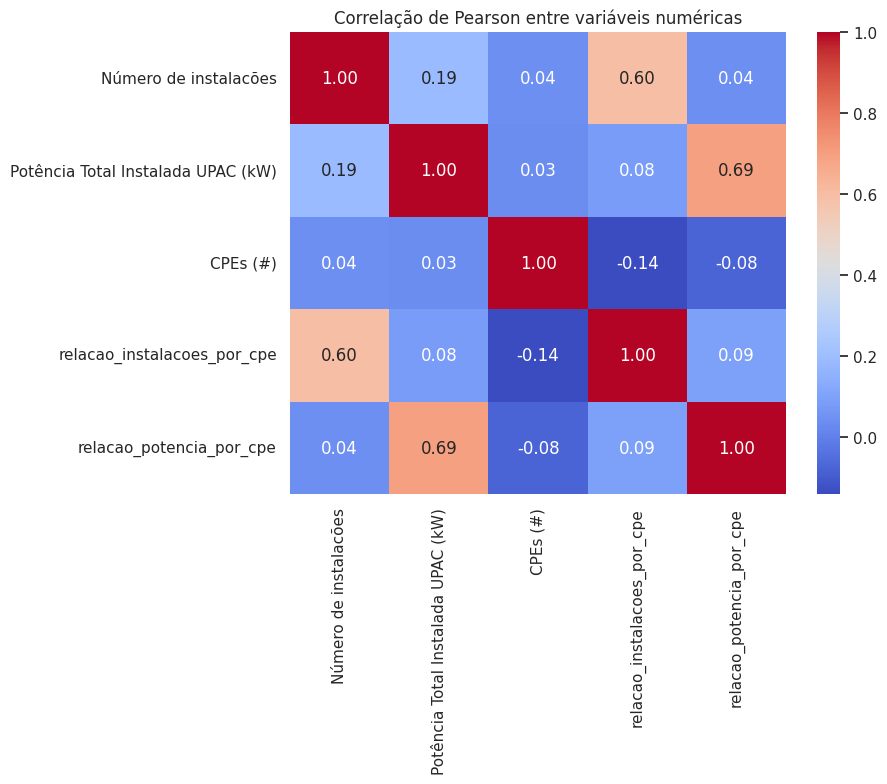

In [75]:
# Selecionar apenas colunas numéricas
num_cols = ['Número de instalacões',
            'Potência Total Instalada UPAC (kW)',
            'CPEs (#)',
            'relacao_instalacoes_por_cpe',
            'relacao_potencia_por_cpe']

# Matriz de correlação
corr_matrix = df[num_cols].corr(method='pearson')

# Visualização com heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação de Pearson entre variáveis numéricas')
plt.show()

Potência Média por UPAC = Potência Total / Número de unidades

In [76]:
# Criar nova coluna: Potência Média por UPAC
df['Potencia_media_UPAC'] = df['Potência Total Instalada UPAC (kW)'] / df['Número de instalacões']

# Conferir algumas linhas
print(df[['Número de instalacões', 'Potência Total Instalada UPAC (kW)', 'Potencia_media_UPAC']].head())

   Número de instalacões  Potência Total Instalada UPAC (kW)  \
0                      1                                40.0   
1                      3                               463.0   
2                      2                               169.6   
3                      1                               136.0   
4                      2                              1720.0   

   Potencia_media_UPAC  
0            40.000000  
1           154.333333  
2            84.800000  
3           136.000000  
4           860.000000  


Com os dados da população criar novas variáveis: densidade de unidades por habitante/distrito.